In [1]:
import numpy as np
import roboticstoolbox as rtb
from spatialmath import *
from math import pi
from matplotlib import cm
from myRobot import myRobot
from math import pi


DHRobot: myRobot (by PRENGruppe13), 4 joints (RRRR), dynamics, modified DH parameters
┌─────────┬────────┬─────┬───────┬─────────┬────────┐
│  aⱼ₋₁   │  ⍺ⱼ₋₁  │ θⱼ  │  dⱼ   │   q⁻    │   q⁺   │
├─────────┼────────┼─────┼───────┼─────────┼────────┤
│       0 │   0.0° │  q1 │ 0.208 │    0.0° │  90.0° │
│       0 │  90.0° │  q2 │     0 │   90.0° │ 270.0° │
│-0.56036 │   0.0° │  q3 │     0 │ -175.0° │   0.0° │
│-0.62662 │ -90.0° │  q4 │     0 │    0.0° │   0.0° │
└─────────┴────────┴─────┴───────┴─────────┴────────┘

┌─┬──┐
└─┴──┘

┌──────┬──────┬───────┬───────┬─────┐
│ name │ q0   │ q1    │ q2    │ q3  │
├──────┼──────┼───────┼───────┼─────┤
│    q │  0°  │  265° │ -165° │  0° │
│ home │  0°  │  265° │ -165° │  0° │
│home2 │  0°  │  190° │ -30°  │  0° │
│home3 │  10° │  190° │ -30°  │  0° │
└──────┴──────┴───────┴───────┴─────┘

  -0.1736    0        -0.9848    0.1577    
   0         1         0         0         
   0.9848    0        -0.1736    0.1491    
   0         0         0     

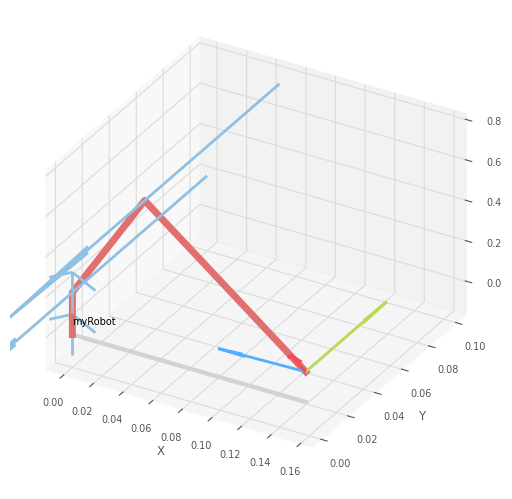

PyPlot3D backend, t = 0.05, scene:
  myRobot

<Figure size 640x480 with 0 Axes>

In [2]:
robot = myRobot(symbolic=False)
print(robot)
print(robot.fkine(robot.home))
print(robot.fkine(robot.home).t)
robot.plot(robot.home)


In [3]:
T = robot.fkine(robot.home2)
print(T)

  -0.9397    0        -0.342     1.141     
   0         1         0         0         
   0.342     0        -0.9397    0.09099   
   0         0         0         1         



In [4]:
T = robot.fkine(robot.home3)
print(T)

  -0.9254   -0.1736   -0.3368    1.123     
  -0.1632    0.9848   -0.05939   0.1981    
   0.342     0        -0.9397    0.09099   
   0         0         0         1         



IKsolution(q=array([ 0.17453294,  3.31612549, -0.52359869,  0.        ]), success=True, reason='`xtol` termination condition is satisfied.', iterations=728, residual=1.6306560189441003e-15)
[ 10. 190. -30.   0.]


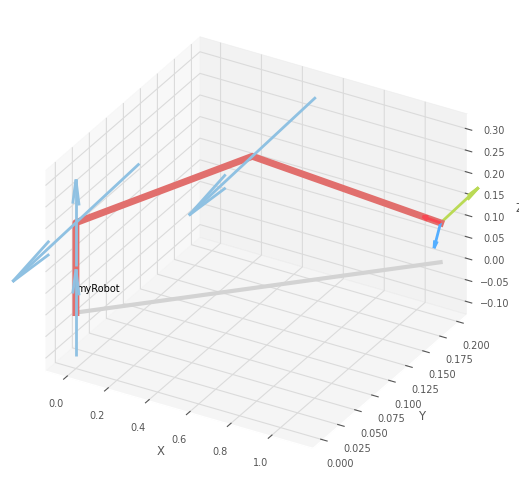

DHRobot: myRobot (by PRENGruppe13), 4 joints (RRRR), dynamics, modified DH parameters
┌─────────┬────────┬─────┬───────┬─────────┬────────┐
│  aⱼ₋₁   │  ⍺ⱼ₋₁  │ θⱼ  │  dⱼ   │   q⁻    │   q⁺   │
├─────────┼────────┼─────┼───────┼─────────┼────────┤
│       0 │   0.0° │  q1 │ 0.208 │    0.0° │  90.0° │
│       0 │  90.0° │  q2 │     0 │   90.0° │ 270.0° │
│-0.56036 │   0.0° │  q3 │     0 │ -175.0° │   0.0° │
│-0.62662 │ -90.0° │  q4 │     0 │    0.0° │   0.0° │
└─────────┴────────┴─────┴───────┴─────────┴────────┘

┌─┬──┐
└─┴──┘

┌──────┬──────┬───────┬───────┬─────┐
│ name │ q0   │ q1    │ q2    │ q3  │
├──────┼──────┼───────┼───────┼─────┤
│    q │  0°  │  265° │ -165° │  0° │
│ home │  0°  │  265° │ -165° │  0° │
│home2 │  0°  │  190° │ -30°  │  0° │
│home3 │  10° │  190° │ -30°  │  0° │
└──────┴──────┴───────┴───────┴─────┘



<Figure size 640x480 with 0 Axes>

In [5]:
q_home = robot.ikine_min(T,qlim=True)
print(q_home)
robot.qhome = q_home.q
degree = np.round(robot.qhome * 180 / pi, 3)
print(degree)
robot.plot(robot.qhome)
print(robot)

In [39]:

robo2 = myRobot(symbolic=False)
target_pose = SE3([1.123, 0.1981, 0.09099], [0, 0, 0], [0, 0, 0, 1])
print(target_pose)
q = robo2.ikine_min(target_pose,qlim=True,ilimit=10000)
print(q.q * 180 / pi)
#print("Joint angles: ", np.round(q, 4))
# robot.q = q
# print(np.round(robot.q * 180 / pi))
# T = robot.fkine(robot.q)
# print(T)
# robot.plot(robot.q)


   1         0         0         1.123     
   0         1         0         0.1981    
   0         0         1         0.09099   
   0         0         0         1         



NameError: name 'Powell' is not defined